In [1]:
from google.colab import files
uploaded = files.upload()


Saving sales_05_8.csv to sales_05_8.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import datetime as dt

sales_data = pd.read_csv("sales_05_8.csv")

In [3]:
sales_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75087 entries, 0 to 75086
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Install     75087 non-null  object
 1   Time_stamp  75087 non-null  object
 2   Status      75087 non-null  object
 3   ID          75087 non-null  object
 4   Payment     75087 non-null  int64 
 5   Game_Name   75087 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [6]:
len(sales_data['ID'].unique())

52672

In [7]:
sales_data['Now'] = '2022-06-10'

sales_data['Now'] = pd.to_datetime(sales_data['Now'])
sales_data['Time_stamp'] = pd.to_datetime(sales_data['Time_stamp'])
sales_data = sales_data[sales_data['Status']=='purchase']

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 27681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Install     27682 non-null  object        
 1   Time_stamp  27682 non-null  datetime64[ns]
 2   Status      27682 non-null  object        
 3   ID          27682 non-null  object        
 4   Payment     27682 non-null  int64         
 5   Game_Name   27682 non-null  object        
 6   Now         27682 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
sales_data['Interval'] = sales_data['Now'] - sales_data['Time_stamp']

In [11]:
RFM_data = sales_data.groupby(['ID']).agg({'Interval':'min','ID':'count','Payment':'sum'})

In [12]:
RFM_data.head()

,Interval,ID,Payment
ID,,,
Aaron_027,60 days,5,40500
Aaron_031,102 days,5,17500
Aaron_077,40 days,4,26600
Aaron_165,21 days,4,49600
Aaron_224,108 days,1,900


In [13]:
RFM_data.columns = ['Recency','Frequency','Monetary']
RFM_data.head()

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60 days,5,40500
Aaron_031,102 days,5,17500
Aaron_077,40 days,4,26600
Aaron_165,21 days,4,49600
Aaron_224,108 days,1,900


In [19]:
RFM_data['Recency'].dtype

dtype('<m8[ns]')

In [22]:
RFM_data['Recency'] = RFM_data['Recency'].dt.days
RFM_data

AttributeError: ignored

In [23]:
RFM_data.describe()

,Recency,Frequency,Monetary
count,5267.000000,5267.000000,5267.000000
mean,66.517752,5.255743,50340.003797
std,35.684775,6.995041,73012.364791
min,7.000000,1.000000,900.000000
25%,36.000000,1.000000,9900.000000
50%,61.000000,5.000000,29900.000000
75%,94.000000,5.000000,55500.000000
max,158.000000,37.000000,582700.000000


In [24]:
RFM_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Recency,5267.0,66.52,35.68,7.0,36.0,61.0,94.0,158.0
Frequency,5267.0,5.26,7.00,1.0,1.0,5.0,5.0,37.0
Monetary,5267.0,50340.00,73012.36,900.0,9900.0,29900.0,55500.0,582700.0


In [25]:
temp_var = RFM_data.sort_values(by=['Recency'],ascending=False)

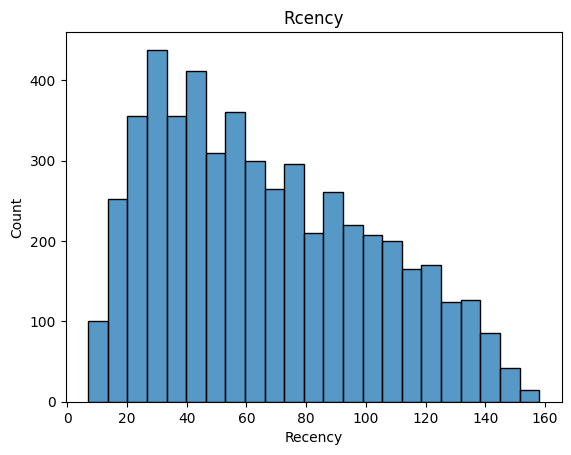

In [26]:
ax = sns.histplot(data=RFM_data['Recency'])
plt.title("Rcency")
plt.show()

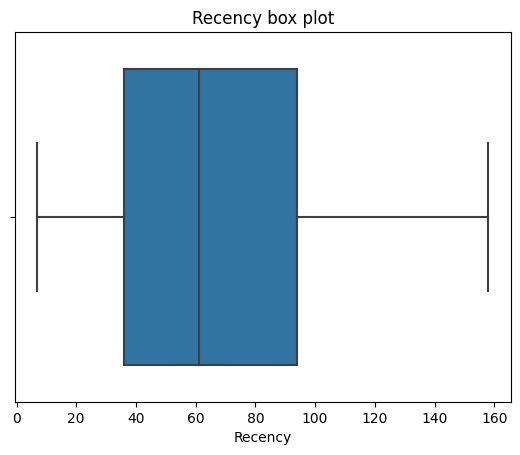

In [27]:
ax = sns.boxplot(data=temp_var,x='Recency')
plt.title("Recency box plot")
plt.show()

In [ ]:
temp_var = RFM_data.sort_values(by=['Frequency'],ascending=False)
ax = sns.histplot(data=RFM_data['Recency'])
plt.title("Rcency")
plt.show()


### 우리 기업의 VIP 찾기

In [28]:
# RFM_data의 R_score열을 만들고, Recency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)

# 만들어진 RFM_data의 Head 값을 확인합니다. 
RFM_data.head()

,Recency,Frequency,Monetary,R_score
ID,,,,
Aaron_027,60,5,40500,65.25
Aaron_031,102,5,17500,37.72
Aaron_077,40,4,26600,78.36
Aaron_165,21,4,49600,90.82
Aaron_224,108,1,900,33.78


In [29]:
# RFM_data의 F_score열을 만들고, Frequency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['F_score'] = np.interp(RFM_data['Frequency'], (RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (1, 100)).round(2)

# RFM_data의 M_score열을 만들고, Monetary열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['M_score'] = np.interp(RFM_data['Monetary'], (RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (1, 100)).round(2)

In [30]:
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
ID,,,,,,
Aaron_027,60,5,40500,65.25,12.00,7.74
Aaron_031,102,5,17500,37.72,12.00,3.82
Aaron_077,40,4,26600,78.36,9.25,5.37
Aaron_165,21,4,49600,90.82,9.25,9.29
Aaron_224,108,1,900,33.78,1.00,1.00


In [31]:
RFM_data['RFM_score'] = ((RFM_data['R_score'] + RFM_data['F_score']+ RFM_data['M_score']) /3).round(2)

In [32]:
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
ID,,,,,,,
Aaron_027,60,5,40500,65.25,12.00,7.74,28.33
Aaron_031,102,5,17500,37.72,12.00,3.82,17.85
Aaron_077,40,4,26600,78.36,9.25,5.37,30.99
Aaron_165,21,4,49600,90.82,9.25,9.29,36.45
Aaron_224,108,1,900,33.78,1.00,1.00,11.93


In [34]:
RFM_data["Class"] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5,4,3,2,1])

In [36]:
RFM_data = RFM_data.reset_index()
RFM_data

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,Aaron_027,60,5,40500,65.25,12.00,7.74,28.33,4
1,Aaron_031,102,5,17500,37.72,12.00,3.82,17.85,5
2,Aaron_077,40,4,26600,78.36,9.25,5.37,30.99,3
3,Aaron_165,21,4,49600,90.82,9.25,9.29,36.45,2
4,Aaron_224,108,1,900,33.78,1.00,1.00,11.93,5
...,...,...,...,...,...,...,...,...,...
5262,Zachary_937,101,4,11600,38.37,9.25,2.82,16.81,5
5263,Zachary_948,48,5,26500,73.12,12.00,5.36,30.16,4
5264,Zoe_163,11,5,105500,97.38,12.00,18.80,42.73,2
5265,Zoe_536,88,1,900,46.89,1.00,1.00,16.30,5


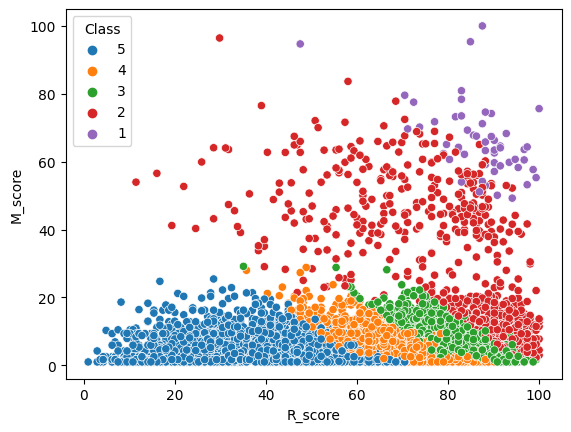

In [37]:
sns.scatterplot(data=RFM_data,x='R_score',y='M_score',hue='Class')

In [38]:
temp_var = RFM_data['ID'].groupby(RFM_data['Class']).count()
temp_var

Class
5    2109
4    1319
3    1049
2     737
1      53
Name: ID, dtype: int64

([<matplotlib.patches.Wedge at 0x7f381bc8e430>,
 [Text(0.3385456299422528, 1.0466073076598517, '5'),
  Text(-1.0857660930761555, -0.17638591532812778, '4'),
  Text(0.0029524460192773545, -1.0999960377485472, '3'),
  Text(0.9638488016234106, -0.5300900749958589, '2'),
  Text(1.099450391857831, -0.03476831666419579, '1')],
 [Text(0.18466125269577421, 0.5708767132690099, '40.0%'),
  Text(-0.592236050768812, -0.09621049926988788, '25.0%'),
  Text(0.0016104251014240113, -0.5999978387719348, '19.9%'),
  Text(0.5257357099764057, -0.2891400409068321, '14.0%'),
  Text(0.5997002137406351, -0.01896453636228861, '1.0%')])

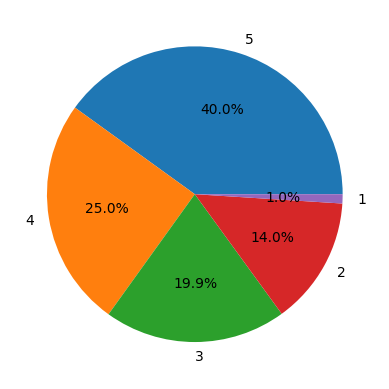

In [39]:
plt.pie(temp_var,labels=temp_var.index,autopct='%1.1f%%')